In [1]:
from unicodedata import east_asian_width
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('CleanDF.csv')
del df[df.columns[0]]
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,2018-01-01 00:00:00,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
1,2018-01-01 01:00:00,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
2,2018-01-01 02:00:00,29.0,25.0,10.0,11.6,5.1,16.7,5.6,0.92,723.2,88.0,7.39,0.001,15.3,43.0,0.0
3,2018-01-01 03:00:00,26.0,18.0,8.0,9.5,4.3,13.6,5.6,0.92,723.4,90.0,6.37,0.001,13.0,48.0,0.0
4,2018-01-01 04:00:00,5.0,11.0,8.0,10.7,4.5,15.0,5.6,0.92,723.8,94.0,5.42,0.001,13.3,48.0,0.0


In [44]:
df['dia'] = df['date'].dt.day_of_week
df['mes'] = df['date'].dt.month
df['hora'] = df['date'].dt.hour
df['año'] = df['date'].dt.year

df = df[['date', 'hora', 'dia', 'mes',  'año', 'PM10', 'PM2.5', 'O3', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'PRS',
       'RH', 'TOUT', 'SR', 'WSR', 'WDR', 'RAINF']]
del df['date']
df.head()

,hora,dia,mes,año,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,0,0,1,2018,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
1,1,0,1,2018,20.0,25.0,11.0,9.7,2.9,12.0,5.6,0.92,723.0,89.0,7.94,0.001,15.5,44.0,0.0
2,2,0,1,2018,29.0,25.0,10.0,11.6,5.1,16.7,5.6,0.92,723.2,88.0,7.39,0.001,15.3,43.0,0.0
3,3,0,1,2018,26.0,18.0,8.0,9.5,4.3,13.6,5.6,0.92,723.4,90.0,6.37,0.001,13.0,48.0,0.0
4,4,0,1,2018,5.0,11.0,8.0,10.7,4.5,15.0,5.6,0.92,723.8,94.0,5.42,0.001,13.3,48.0,0.0


In [68]:
def graficarGrupos(df):
    rows = ['PM10', 'PM2.5', 'O3', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'PRS', 'RH', 'TOUT', 'SR', 'WSR', 'WDR', 'RAINF']
    fig, ax = plt.subplots(len(df), figsize=(15,30))
    fig.tight_layout()
    
    x = range(len(df.columns))
    for i in range(len(df)):
        ax[i].set_title(rows[i])
        ax[i].plot(x, df.iloc[i])

## Agrupando por horas del dia

In [70]:
hour_group = df.groupby('hora')

dfHoras = pd.DataFrame(hour_group.get_group(0).mean())
dfHoras.columns = [0]

for i in range(1,24):
    dfHoraK = pd.DataFrame(hour_group.get_group(i).mean())
    dfHoraK.columns = [i]
    dfHoras = pd.concat([dfHoras, dfHoraK], axis = 1)

dfHoras.drop(index = ['hora', 'dia', 'mes', 'año'], inplace=True)
dfHoras

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
PM10,60.530781,58.163541,55.527382,53.709677,52.401350,53.147037,56.086401,61.075019,67.524381,74.542793,...,68.595041,64.501125,62.174794,60.631381,60.464662,60.209302,58.937641,60.109527,62.097598,61.911411
PM2.5,25.353724,25.189872,25.146542,24.326542,23.738132,23.191335,23.660977,24.275124,23.326939,22.116299,...,21.144726,21.151073,21.735394,22.284752,23.113594,23.819520,23.240210,23.740893,24.940248,25.480758
O3,20.006006,19.498875,18.908477,18.063016,17.040510,15.694674,13.788129,12.177794,12.328582,15.018769,...,43.247183,43.818455,42.180795,38.528529,33.953418,28.665416,24.751502,22.692423,21.548048,20.768018
NO,13.567718,13.582446,13.258215,12.978920,12.902251,13.597824,16.133509,20.367742,23.021755,22.133559,...,10.982945,10.941260,10.906377,10.722973,11.186326,11.527832,12.091967,13.215079,13.930180,14.064264
NO2,15.058709,14.844186,14.641785,14.471493,14.645386,15.697899,17.315101,19.148312,20.558440,22.196396,...,15.111119,13.901875,13.242611,13.022447,13.375131,14.336084,15.307583,15.759190,15.923649,15.650751


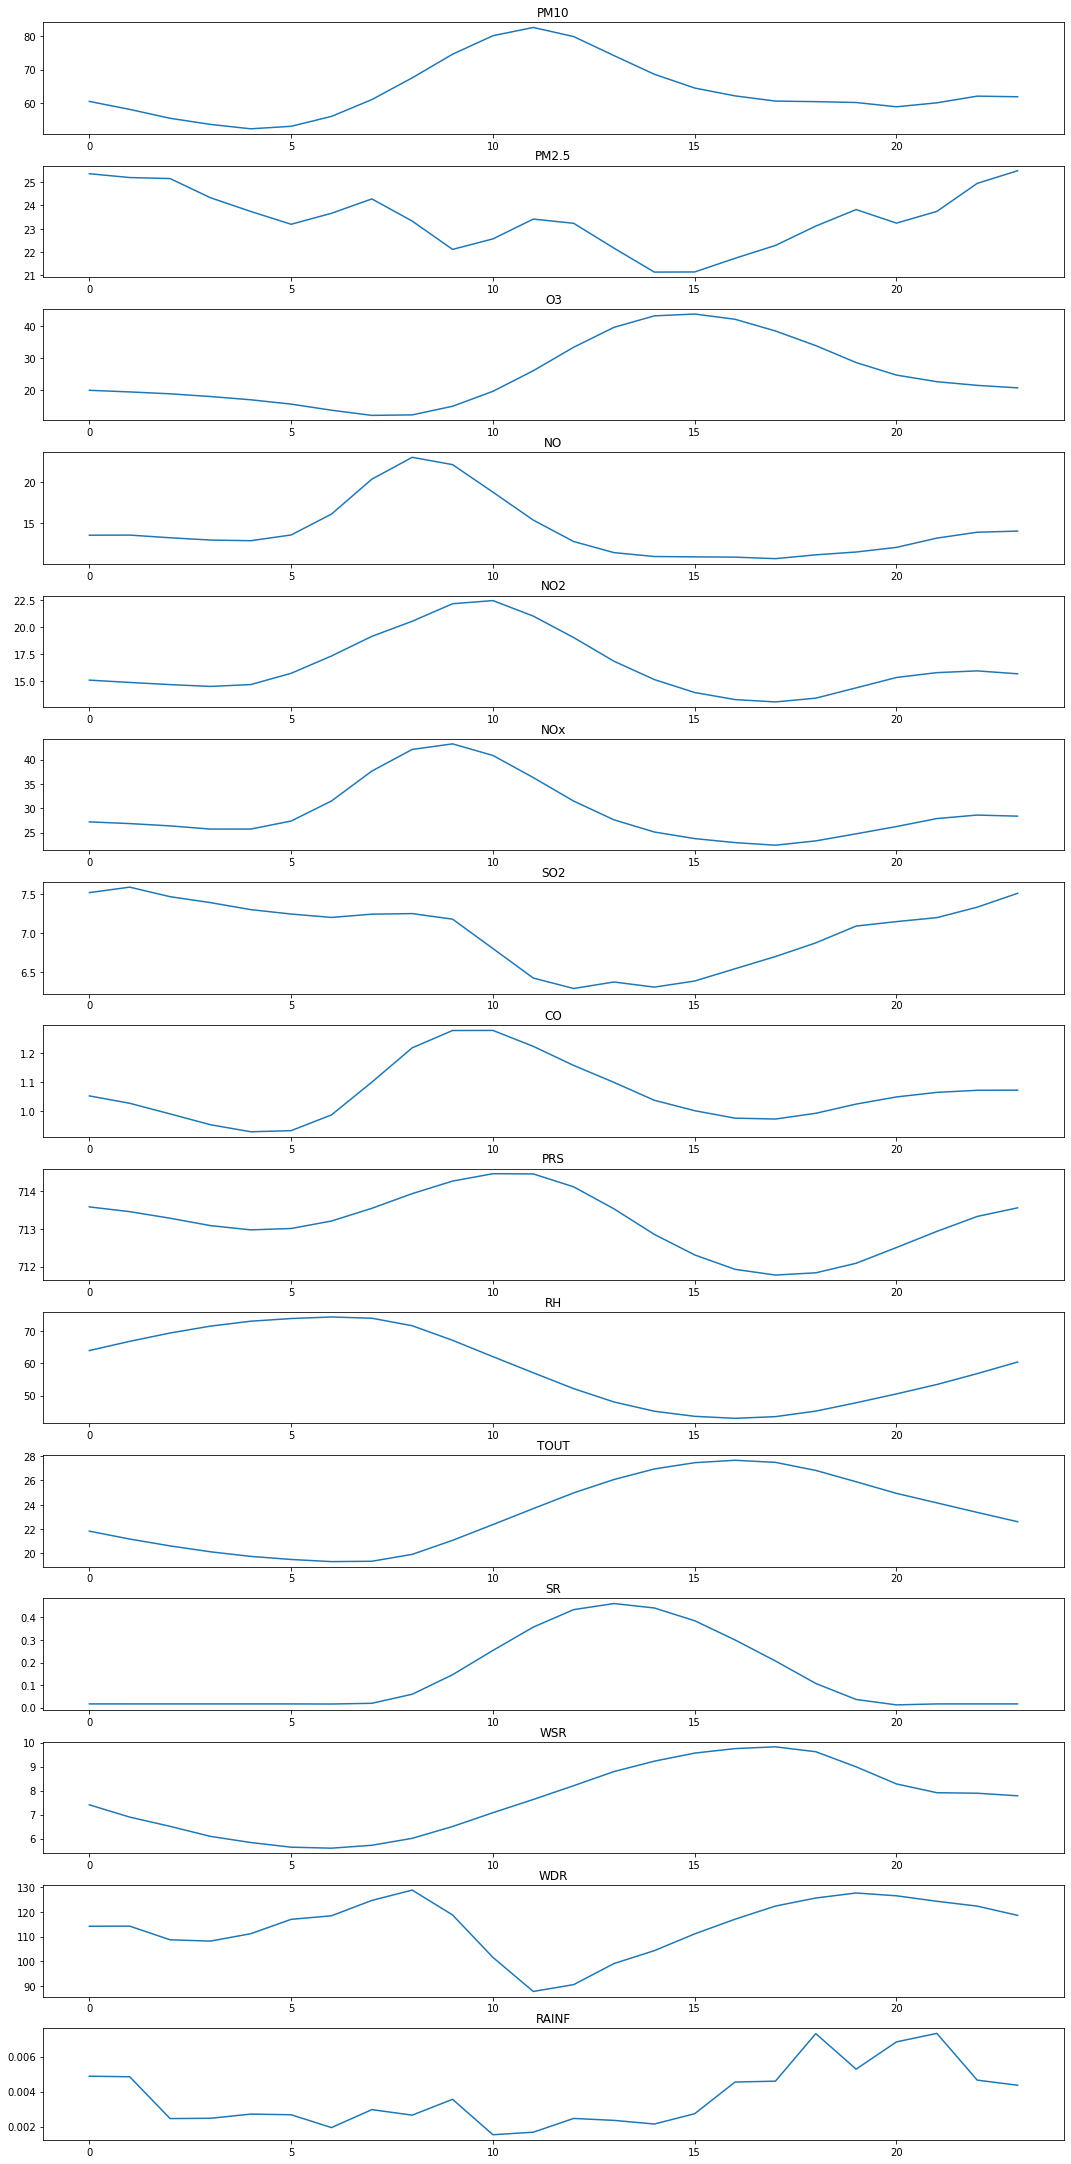

In [69]:
graficarGrupos(dfHoras)

## Agrupando por dia de la semana 


In [74]:
day_group = df.groupby('dia')

dfDias = pd.DataFrame(day_group.get_group(0).mean())
dfDias.columns = [0]

for i in range(1,7):
    dfDiaK = pd.DataFrame(day_group.get_group(i).mean())
    dfDiaK.columns = [i]
    dfDias = pd.concat([dfDias, dfDiaK], axis = 1)

dfDias.drop(index = ['hora', 'dia', 'mes', 'año'], inplace=True)
dfDias

,0,1,2,3,4,5,6
PM10,61.189219,63.942988,65.846910,67.589035,66.867076,63.675148,56.778021
PM2.5,23.122529,23.528423,23.726231,23.683577,23.409480,23.257677,23.293066
O3,24.717809,24.919415,24.582314,24.110526,24.572275,25.432770,27.126563
NO,15.102903,14.724350,13.136747,14.278531,13.753060,14.264510,13.779074
NO2,16.605522,16.835925,16.552817,17.245614,16.726146,16.506383,14.324633
NOx,30.365779,30.191832,28.703712,30.798794,29.193595,29.579601,26.377912
SO2,6.819661,6.845994,6.895044,7.056676,7.190410,7.133027,7.148644
CO,1.087608,1.062927,1.057235,1.059612,1.083983,1.061564,1.014514
PRS,713.094086,713.202512,713.135597,713.302741,713.425817,713.072275,712.909498
RH,57.911174,59.984709,60.190435,58.972807,58.342838,58.410178,58.461285


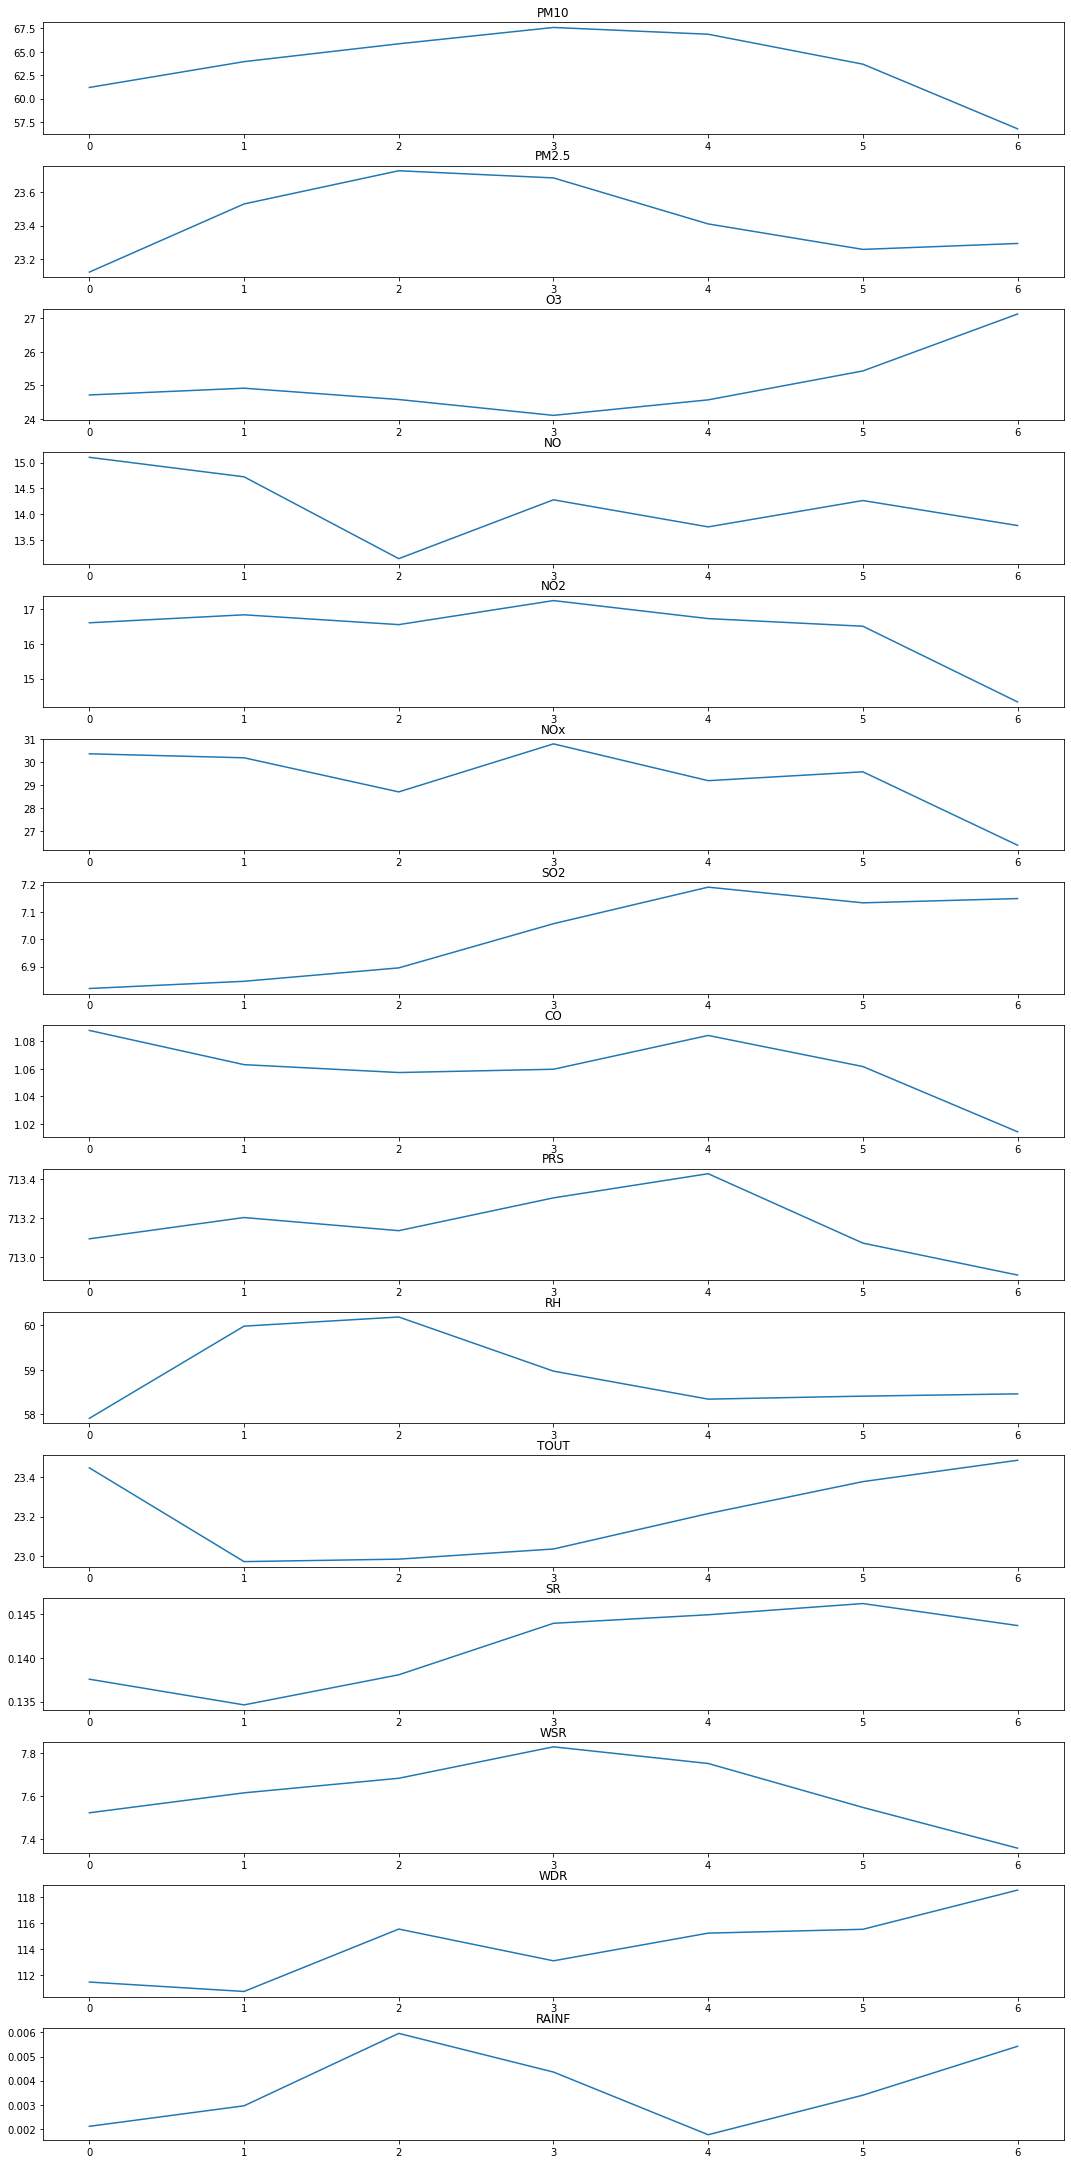

In [75]:
graficarGrupos(dfDias)

## Agrupando por mes 

In [78]:
mes_group = df.groupby('mes')

dfMeses = pd.DataFrame(mes_group.get_group(1).mean())
dfMeses.columns = [1]

for i in range(2,13):
    dfMesK = pd.DataFrame(mes_group.get_group(i).mean())
    dfMesK.columns = [i]
    dfMeses = pd.concat([dfMeses, dfMesK], axis = 1)

dfMeses.drop(index = ['hora', 'dia', 'mes', 'año'], inplace=True)
dfMeses

,1,2,3,4,5,6,7,8,9,10,11,12
PM10,73.783793,78.641962,68.536290,68.443518,55.600874,51.997219,65.304772,50.146540,52.033812,52.211022,69.566204,77.580602
PM2.5,23.772340,26.502581,23.523233,24.172402,21.080000,21.485471,24.510753,16.503531,17.014358,31.509857,21.093519,31.573722
O3,19.864492,20.335177,31.518481,29.553162,27.940504,25.321863,27.489919,26.821681,22.165818,24.155018,21.610648,20.775034
NO,23.189677,27.389712,28.982258,15.524844,14.609277,8.004762,7.784677,5.046257,4.889115,5.375000,10.265370,13.289897
NO2,23.993141,31.415560,26.935853,18.136379,10.245580,11.489746,9.888575,7.656992,9.519453,10.487366,14.714954,20.267984
NOx,44.189677,55.361173,55.036290,30.057366,23.596773,18.669065,16.439449,12.414866,16.127189,16.687231,26.585278,30.605478
SO2,10.115434,7.891482,5.528360,5.099235,3.918325,3.688460,2.401181,7.494400,10.908245,10.526299,9.271204,10.669600
CO,1.180064,1.318577,1.097856,1.064522,0.836463,0.905075,0.956331,0.916610,1.006253,1.133042,1.216792,1.190233
PRS,716.499193,713.883850,713.522480,711.482377,710.807532,711.473931,712.598185,712.210099,712.650764,713.482437,715.229444,714.989582
RH,60.135844,60.130531,57.320901,55.922836,62.754876,59.673618,56.963038,54.414901,66.905512,62.548835,62.361574,49.032780


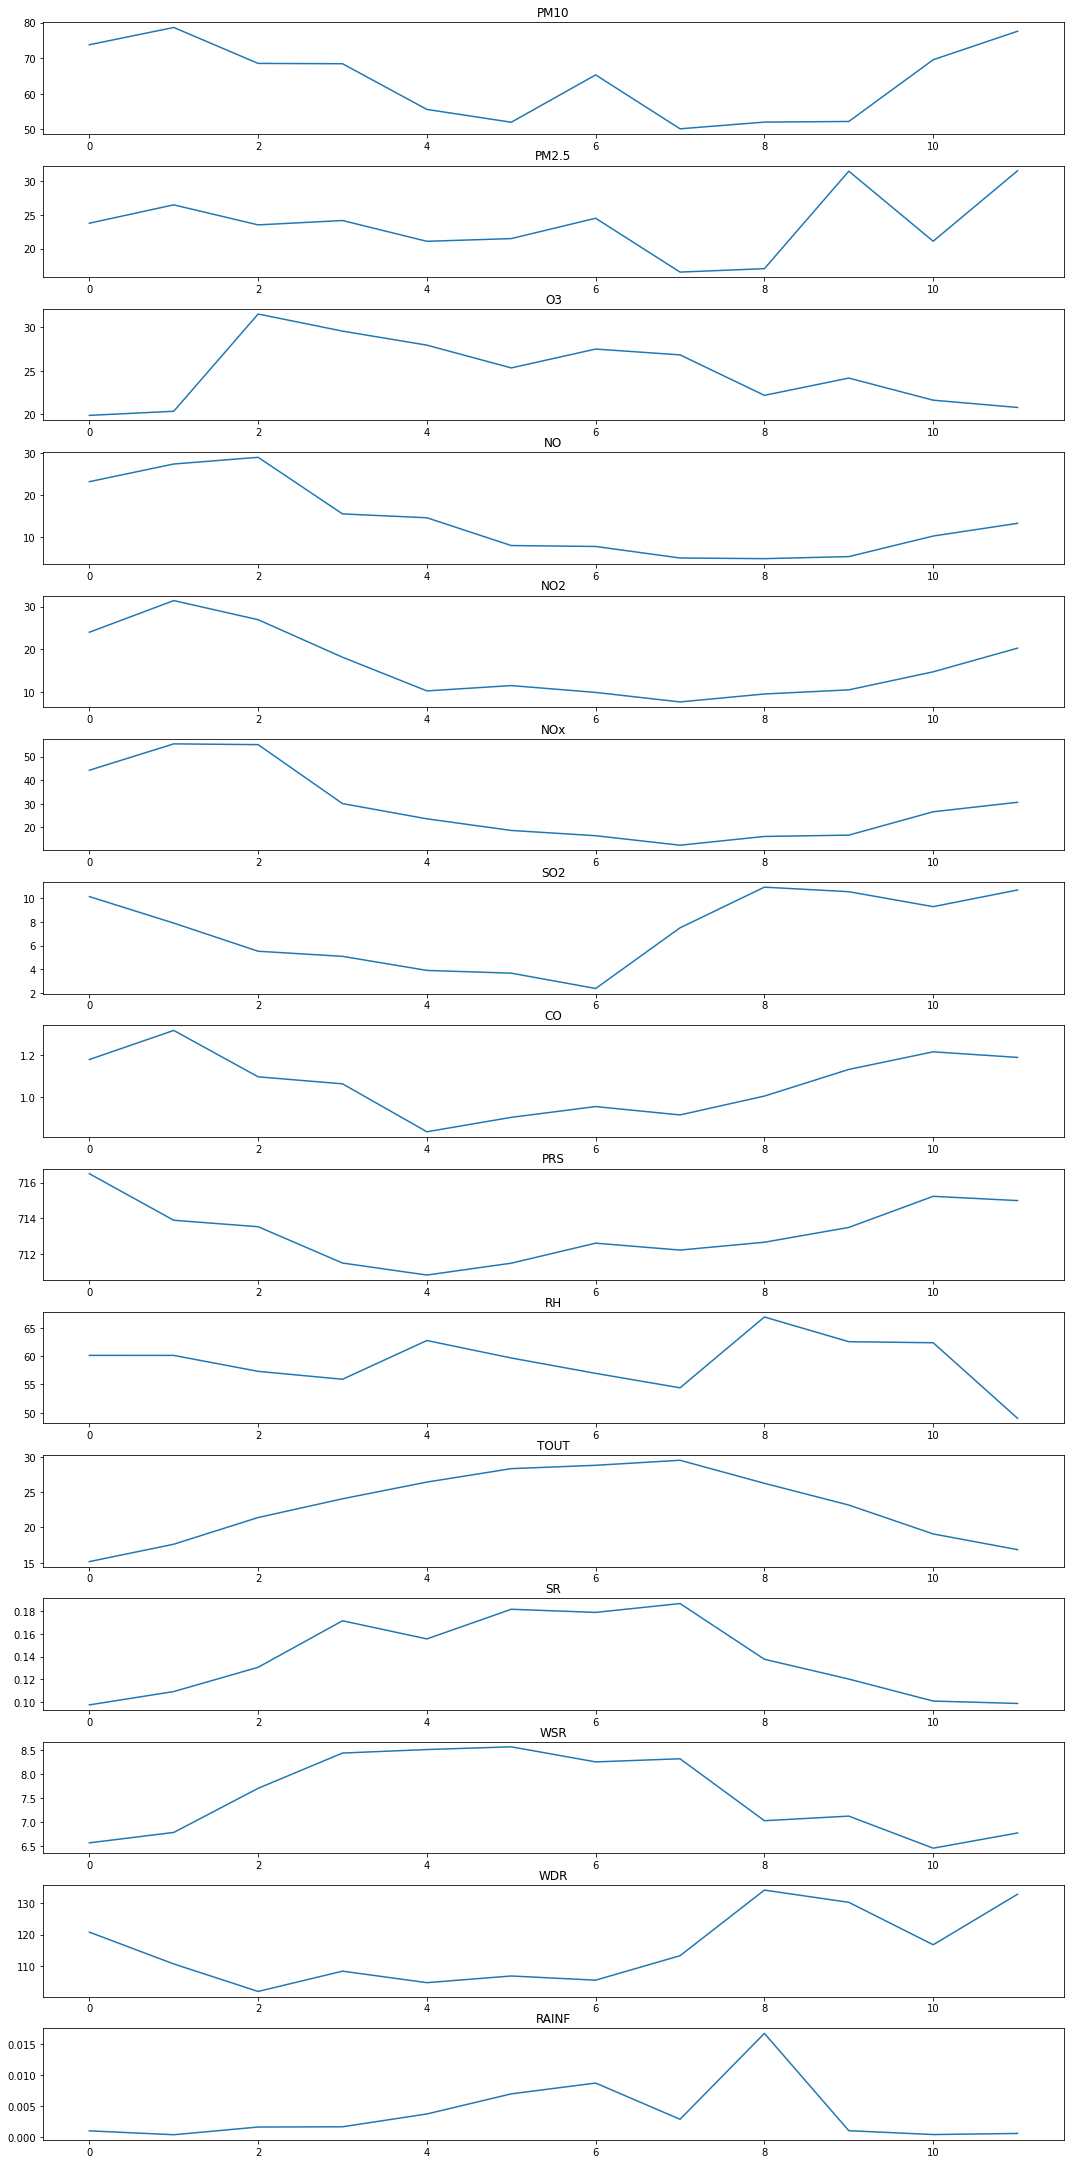

In [79]:
graficarGrupos(dfMeses)

# Estandarizando las columnas

In [108]:
def graficar(df):
    fig, ax = plt.subplots(len(df.columns)-1, figsize=(15,30))
    fig.tight_layout()

    x = range(len(df))
    inde=1
    for i in range(len(df.columns)-1):
            ax[i].set_title(df.columns[inde])
            ax[i].plot(x, df[df.columns[inde]], linewidth=0.2)
            inde += 1

In [94]:
s_array = StandardScaler().fit_transform(df[df.columns[4:]])
sdf = pd.DataFrame(s_array, columns = df.columns[4:])
sdf = pd.concat([df[df.columns[:4]], sdf], axis = 1)
sdf

,hora,dia,mes,año,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,0,0,1,2018,-1.117455,0.077010,-0.734535,-0.188352,-0.829853,-0.513578,-0.210925,-0.245305,2.514699,1.476532,-2.158259,-0.728518,2.467517,-0.919085,-0.069167
1,1,0,1,2018,-1.117455,0.077010,-0.734535,-0.188352,-0.829853,-0.513578,-0.210925,-0.245305,2.514699,1.476532,-2.158259,-0.728518,2.467517,-0.919085,-0.069167
2,2,0,1,2018,-0.887306,0.077010,-0.786758,-0.107911,-0.694619,-0.374187,-0.210925,-0.245305,2.565827,1.427482,-2.235961,-0.728518,2.404929,-0.932155,-0.069167
3,3,0,1,2018,-0.964023,-0.266698,-0.891204,-0.196820,-0.743795,-0.466125,-0.210925,-0.245305,2.616956,1.525581,-2.380063,-0.728518,1.685167,-0.866806,-0.069167
4,4,0,1,2018,-1.501038,-0.610406,-0.891204,-0.146015,-0.731501,-0.424605,-0.210925,-0.245305,2.719212,1.721778,-2.514276,-0.728518,1.779049,-0.866806,-0.069167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,21,2,8,2021,-0.554868,-1.003215,-0.577865,-0.438143,-0.405710,-0.525441,NaN,0.624070,-0.092844,-0.387340,0.857990,NaN,1.372227,-0.330948,-0.069167
31974,22,2,8,2021,-0.887306,-1.003215,-0.368971,-0.484714,-0.510209,-0.608482,NaN,0.519745,0.009413,-0.289241,0.761923,NaN,1.184462,-0.213320,-0.069167
31975,23,2,8,2021,-0.606013,-0.659507,-0.473418,-0.463546,-0.418004,-0.549167,NaN,0.815332,0.111670,-0.093044,0.672918,NaN,1.309638,-0.344017,-0.069167
31976,20,2,5,2019,NaN,0.568021,1.615514,-0.484714,-0.756089,-0.667798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


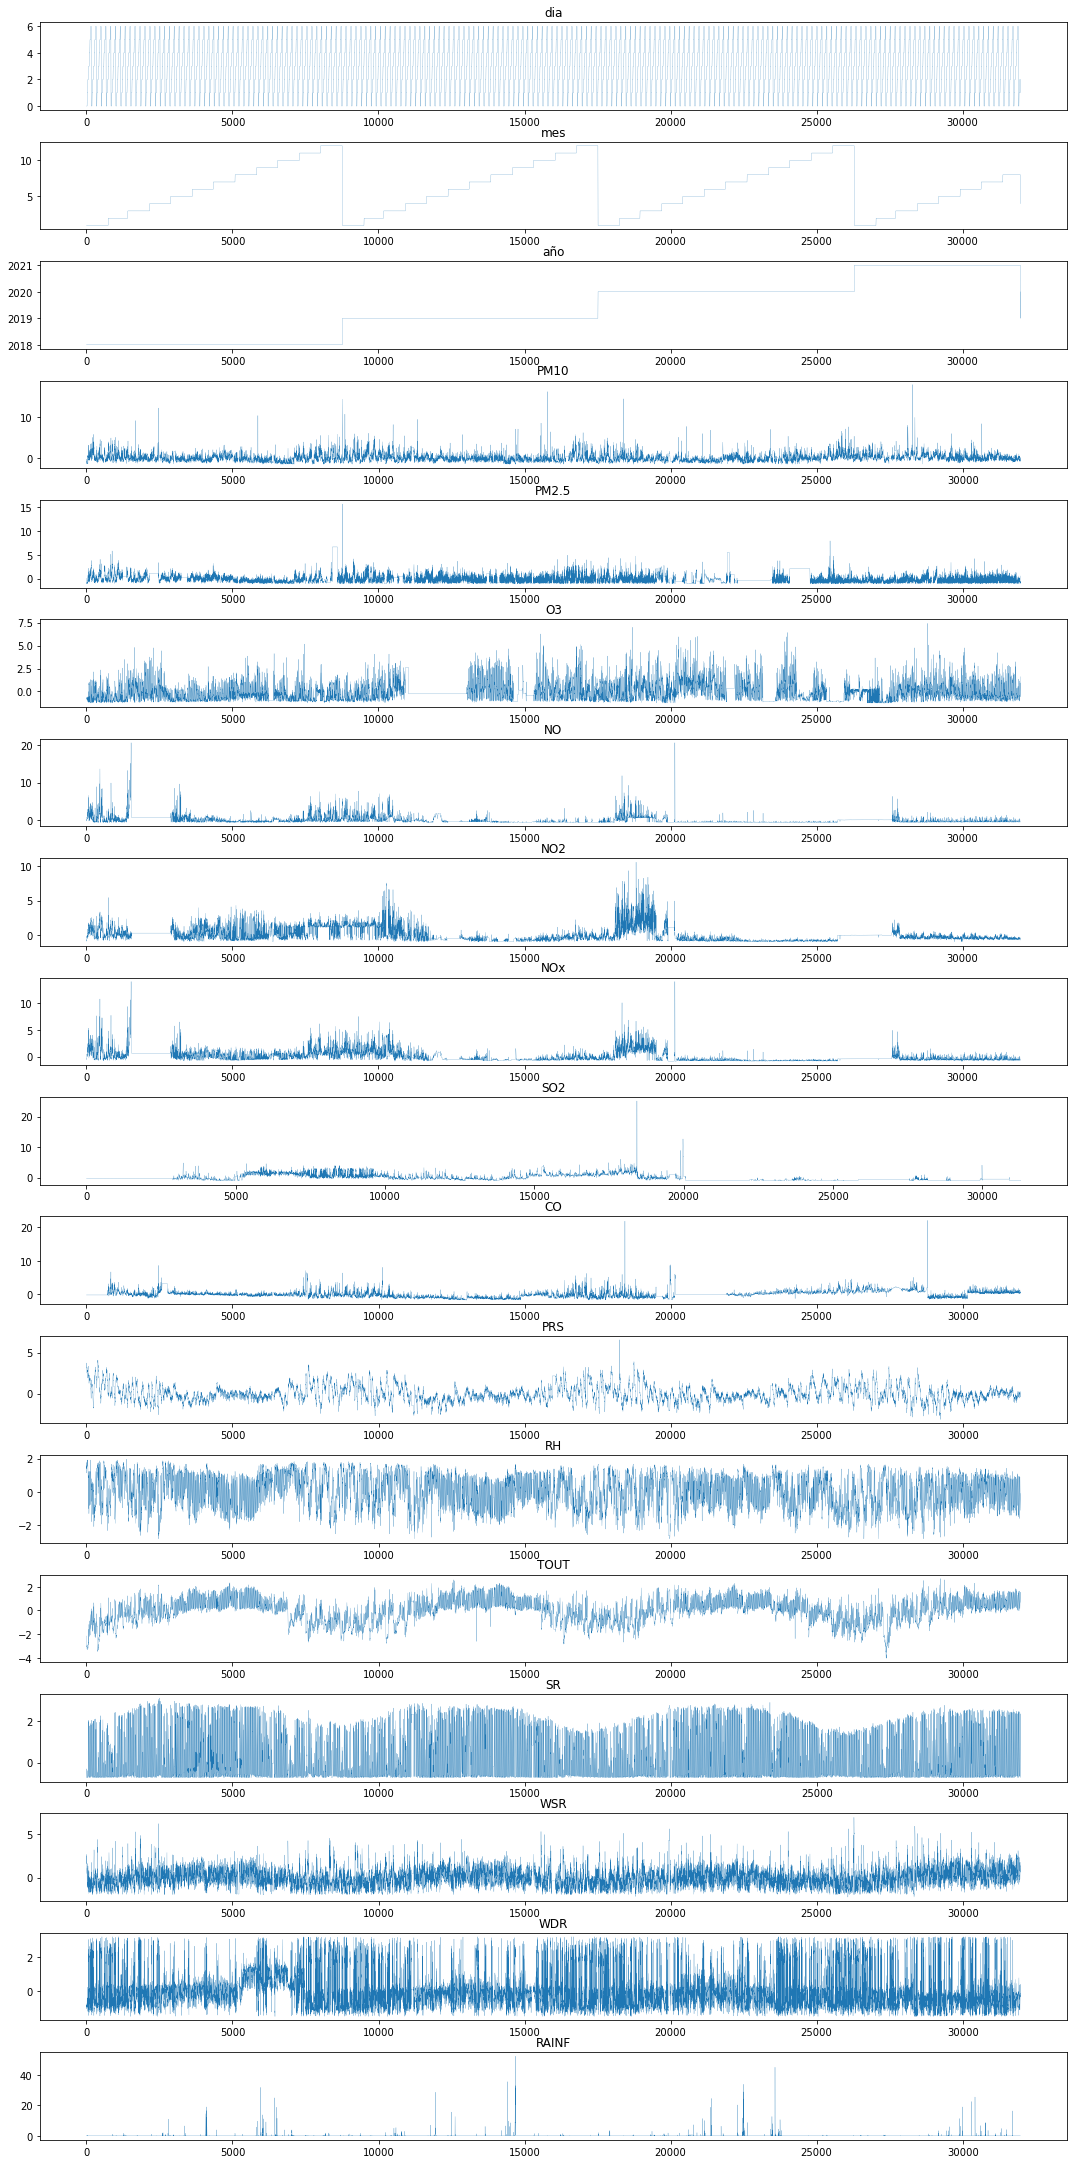

In [109]:
graficar(sdf)

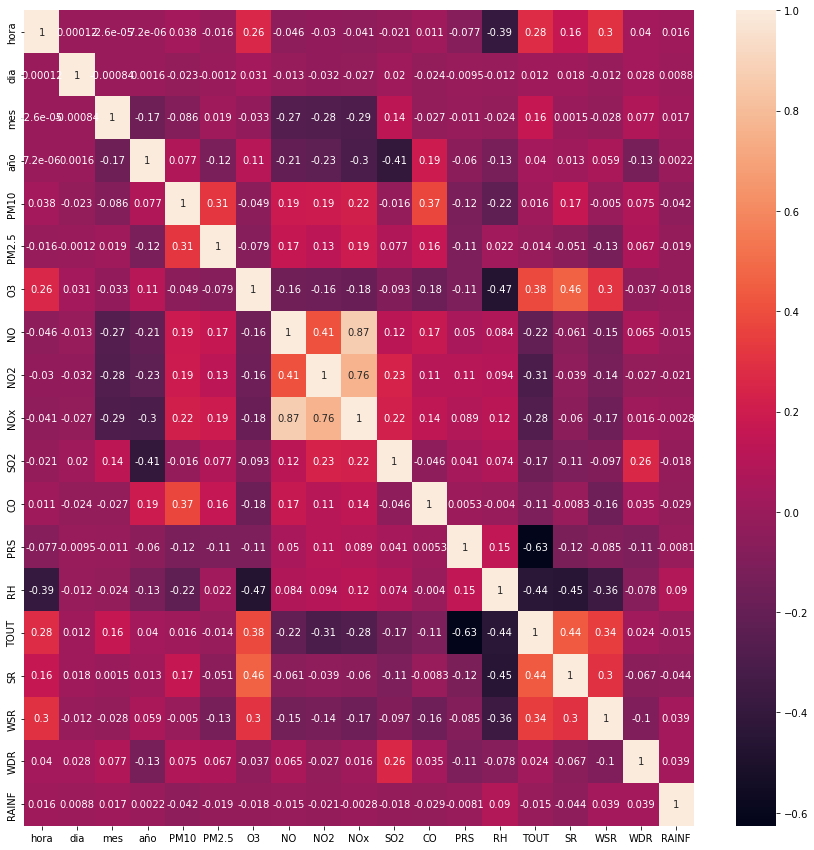

In [110]:
corr_df = sdf.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

# PCA

In [114]:
values, vectors = np.linalg.eig(np.array(sdf[sdf.columns[4:]].corr()))

In [116]:
sum(values)

15.000000000000016

In [124]:
proportion_val = [i/sum(values) for i in values]
proportion_val.sort(reverse=True)
proportion_val = np.array(proportion_val)
proportion_val.cumsum()

array([0.22307926, 0.37245132, 0.46998577, 0.55607538, 0.62885993,
       0.69521277, 0.75169198, 0.80155089, 0.84835569, 0.88718429,
       0.92174554, 0.9543897 , 0.98331739, 0.99833886, 1.        ])

grafica de codo de proporcion de la varianza representada por los componentes principales

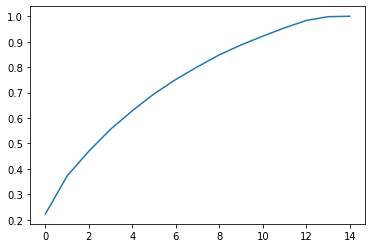

In [123]:
plt.plot(range(len(proportion_val)), proportion_val.cumsum())

# Analisis de Factores

https://www.datacamp.com/tutorial/introduction-factor-analysis
